In [1]:
push!(LOAD_PATH, "../src")
using VariableHeightInvertedPendulum

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Parameters
g = 9.8
x0 = -0.3
z0 = 1.
zd0 = 0.
zf = 1.;

In [3]:
do_export = true;
# const sim_visualize = sim_figure
const sim_visualize = sim_movie

sim_movie (generic function with 1 method)

In [4]:
# Orbital energy controller.
model = CubicControlledVariableHeightInvertedPendulum("cubic", g, zf, false);

In [5]:
sim_visualize(Scenario("slow", model, [x0; z0; 0.9; zd0]); do_export = do_export)

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAA1wJtZGF0AAACrwYF//+r3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY5OSBhNWUwNmI5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNiAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEyIGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAPyBliIQAN//+9vD+BTY7mNCXEc3onTMfvxW4ujQ3vc4AAAMAAAMAAAMAARIMGrm4A0J8xwAAAwACR+AeC0j/MJqacVktuj4bIu0Lnz9Y9K0KRJLt2Uhj5PR4jpOltEVuNalvla4g61dBaulxbsGAARVkaWDLex8zrUy/2Z5EwMJSfNHIxejP7aPVHhIYmlWh+hkpbB0K9SwF5jryW5BqdNTF1EfC41q79IbgLcMM0y6167veamg4ckkkvmErpSa6slzq8asNACPZUwZp3GkxtHAXyldvAUJ3+O4NGWJ6L7S0YwHCsE/FY6wlpSs+okKiZBgpht1hQcSRHzXeNIp0SnD9MmYUMAYbYRCdWdKJQQ1Bx7cqZfhWWSvHpaF6tCPDVxJUS6V9FCC9Vux7sskAsf0wicmEPVJ4trImoilJ7Yqk5NfKmJqrMkTCfANdPEBUcEzojtV8NF7LUyOVbxRGNA9l+MVO9e3FeQbZnPQA+0/BH0ijxyxWncWQvRv/on/AIeJsI6nen62wjIggMVYw8EubvkKB667dzEeRkeyvXr1ACD1dAz7yOCbm/9HQnZQcst8pehrgi2tJDJbEqaoijMilTlNrixokTP38p8v4qOoFggFwKD1Gy0gOiwhDs4n++vj22dYCXeXXUm0T2IZ8FKHhl4mfLCyTopdVl0+/XWjlTxiUDPNxFiZ8DE8zi8Aoxwlba06A8R8YFoRN/aD9hb2ZBQ+3yhkmBkP1PunLvo5GNa/0y6UmqJ7Xju2/1N0gbCQxGTZmqkxgGZ6djGvdek9tShqrk/+P/rtQ5akxSb0Yitfk3VSItwFnZ1NhMUFzfG7sYL3ZdNSmweKjrCaffistvaCwYxU3ObnOesyM9PAsPK4DZCtFDBnRbWNXyp19IIed0Y9my5DZOVzqvkMgzuF7Zrb6hEQnustGPV+ppy10F1jt/NmFxBaQZ211cgvSfAaPs2BmkTNY1K2KyLxrSh2B4L6Chw7VhqJkZdsqsrM0DkXOnCG5U2RbtD4uknRQYie6Yhk/xYiArcina7vE1Lvv2YcY+sGJcVzye46Yc8nu+sSJ47NUAAEfvzqkdhyZhZdZGanWjPX5FD0XRaHKYsL/oHtD+fsqG5cgjZ1+j5YrKERUKFat4fLbkPwtol4udL9j6npQDCb18sIyGvXhir06scWUWS2VMR5/ZcrLMb2BYmtyCDRkC+tA1Ja83A6PeAdZapaqfvIEb7u0Q7lobbwRBbSGTl/kJu+Su53C4Olj0/ubx4iFvcRaJSOLUSDn75DV/LpbDdmLp/PU/L/m54T4keCjJAE5aqQqkQZxigTM/UbnR1dh8gxQS37ovY3ibjNqXZhxpcgVwRodLYozV6QtecGY/bNryC1IXQFrZwXfsOKu4zxbsqQEwwNTPUf2m4STpqAry/vy1H2DYTB9k2IlsZCfku+J7CrDWw/Cp/fWZIqBhkkC5/MYoNLj1PHoJ9MXqk97grTT6rXAHBjwJ6FY+pV0nGTzPQ0clBP4NnsfsAijdGQykY55RwwZfrZ815coG75dqpAbC1otJZw4ndOltH8Df+mQtdUJJAPQHZBVwuYn24cGLHNYI+Q3BnQ3bouYYAkRAho+siyOzaJnEA1rCdjvENNEQVJcNRY14pXY2g1KTDMKkMKWbyHSJy1GAzyV1OqXfX2HDFix9/8cgl2jG/Y125sJQdhgECHtUlsqVjGtCHA09YlmbjcRGabCrep2jau+yux4ZJLIm7K90O48DJlpfuFKyckkL4sBCqi2u02DZwtm8EPuFqKQBHUH6bJCgw1BVi81QVnd5ve0kwZkW/T63hsAxAKWGItC6HRtrHgZhc2tZr1lKqdbxb+5sG1Xc+QHQSf8c8fL1gFNMnN59CwCvM1XBKCPJx/HXakCOWWpxngODIJZx2te7BeM3TnqfJPykwdt9iuQ19OUEmN8f5M4f2BGZP9SeUDj7s/MkJSvaQLld84EuQQKD+ToclaoUuffo4xGRMGjBokzts0g5Y964COZJ7PoMxb6sTPehG0hr+JHLOE7FrzXW21nL75UdwLOaqPJfXeR6f1o1hIe5TXk88HLfAcNuz05O99OfVeUhBA3JDNUSdEyOTBwo7sodMGrMACiWOdZfT4tExdqaLmZrc960TzrqV8m8TCwXmvuaYTZ7tVy057hcpF2CXWsoZ9egbyLQI8SnZRnVgvgf3XHK+M/exjhd2NZkLGJc1N5ykwasQ0nVR7gsZ9+OXcMqTtJZd4T7P7KEJZQc0vz2+lh19gcFMiWgQy0mG2kiXP3knADFsmT7reMz4KS9p8vCrazmxN3q1PVp4H6wad/SA8ET/rtO98ztEK0I4LUVeXUO4BaPcCJR28+nBCfjBMxV9eZj/gEZIQMyWKb3KY8k+E09cBNQ7lE5ROC8Gse5y/P7L4AdLxX7o34EaF2nyoqmRrzw2NzJM8jKdzmZL/cz5XO7O7qqusJXeO2SpiQFcGd+KW+jiA1Ike8PogxfVaxhXQ/YvyOKGXqh/McnOElBh3y/d0oVUpMj5psPgkl2PzO56QaZ30MdSsQ8FYABj4TEdSCvcPRZtQzx/83R8iKl1R7ulfGiCZw/38+4q5Z75L9RFgc9bKOqOysxjrrzyrq1I89JK5GfHUkOecX93q9BQ+kpFs39pruObY+0ZTop60D/1I8c8jE4lUpoEZHYFlCjfjFW1OjYAu3Kj6N1ebguZw4BCJwvdSUm0a8m22xIr8XH/Dn6m4tpxR5Y1KrsDZZ/4mY3Pqm9TrxM3PuT8GnAP4nV6bjWhoBSAw5BiNM9y5qGVZ7EUWS+TAXKbwV4D7BvUFcCIm66iQh5+38f8BpL4uaAarX53O+yOkgW0GH1i9LhW6lmYgonrBAeItRYzsaXexhp5SWbEqRuPC/eCRoHW7FlQgkTgVI2ZB0GWs44RxDUFoX+qth8swJszp5SFOPx3sJrHaJhfNoTI89vHWMypWbpWe

In [6]:
sim_visualize(Scenario("fast", model, [x0; z0; 1.0; zd0]); do_export = do_export)

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAA7bVtZGF0AAACrwYF//+r3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY5OSBhNWUwNmI5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNiAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEyIGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAQS9liIQAN//+9vD+BTY7mNCXEc3onTMfvxW4ujQ3vc4AAAMAAAMAAAMAARIMGrm4A0J8xwAAAwACR+AeC0j/MJqacVktuj4bIu0Lnz9Y9K0KRJLt2Uhj5PR4jpOltEVuNalvla4g61dBaulxbsGAARVkaWDLex8zrUy/2Z5EwMJSfNHIxejP7aPVHhIYmlWh+hkpbB0K9SwF5jryW5BqdNTF1EfC41q79IbgLcMM0y6167veamg4ckkkvmErpSa6slzq8asNACPZUwZp3GkxtHAXyldvAUJ3+O4NGWJ6L7S0YwHCsE/FY6wlpSs+okKiZBgpht1hQcSRHzXeNIp0SnD9MmYUMAYbYRCdWdKJQQ1Bx7cqZfhWWSvHpaF6tCPDVxJUS6V9FCC9Vux7sskAsf0wicmEPVJ4trImoilJ7Yqk5NfKmJqrMkTCfANdPEBUcEzojtV8NF7LUyOVbxRGNA9l+MVO9e3FeQbZnPQA+0/BH0ijxyxWncWQvRv/on/AIeJsI6nen62wjIggMVYw8EubvkKB667dzEeRkeyvXr1ACD1dAz7yOCbm/9HQnZQcst8pehrgi2tJDJbEqaoijMilTlNrixokTP38p8v4qOoFggFwKD1Gy0gOiwhDs4n++vj22dYCXeXXUm0T2IZ8FKHhl4mfLCyTopdVl0+/XWjlTxiUDPNxFiZ8DE8zi8Aoxwlba06A8R8YFoRN/aD9hb2ZBQ+3yhkmBkP1PunLvo5GNa/0y6UmqJ7Xju2/1N0gbCQxGTZmqqqmZfeKITBstr1HrlSlOVQ2pGINmvjA9sD8IS9bZbaqvIPRX3rFmJMZuVswV4aTDd+tac/OZAWzQOUcclgQaacBksfHekXzgdtdKNqFTajSz386k1y7ZL16QGPfJANJlhrBtSejSA65EAHiGIjXwVzrgLIDYEgRMJb395yjEjjNqf/zRcvxmuBloN4jhZomql1Bv94AxQxIJpapdmQhuR3nTPp1EAAbIqNtly7+vYlC5Fg4ZRSQyD+QqP7/NNmY2OwQoUsQUNv0rj7qQq1D5IULkePGsENcn+mdwvawI2BREJccQYAWBosDwgdclFpGsR6x7VzcmRgsL98+e7cwribDalF+BjjPhTax/L8Ek70jJlmEqDYA8tRPrCSaTWWi+iFQlWj2U7TU4A1UO2o6ELicWC/BpBpAX7Uj6n/1ehJj2yfj3FBGjS501QQSx0fEhT4wGxKW9XcHOlKyZthN15JlYgKE1rRrn+d6p19FOB16obveNybvlhQeKkQ6cObYPNep+Bd2/D7nnQxNSvKR9ebnwGfPGWUrWCEKqjXYUhqO0mJLiJwVWs+KCW/dF7J8wYlOpdmHGrY/doX7s73pmr/ebg4Mx+2bXkGIF22DrZwXfwFbu4zxbsqQGB8XbUiSJ7TP+JFjyq8PyBgbJayYABqi94XvPhpaj9axHrXIxuN1CRUDF4ts8BbbTykEpL2CjcAWq1NcvKKvs6pxLGPAnoX2alXScZPM9GWpvqfjw/CfJluYctp6uatqsJPgo/kwdwY6kXiAAGuvquqmNRaL06W0fwA/8+h7T7jpn79hkhk6CuJwjoMZ5lIcZqmxBsl4IuYYAkRAfjOIWre7aN71d0ugkNI8QDlTcmnh2G+5ldjaDXC1HICwZSzeQlyOWowGeSup1S76+w4YsWPv/jlae0Y37Gu3NhKByNQMQ9qktlSsxmi8QJLM0+TcWkRmmwq3qdourvsrseGSxADyO+pFMugZMtnUwUrJySQ1iwEKqLa7TgvBKm0QlyoLWEgC77fyIyFBhnyrF5qgrW/MdFpJgzIt32+C8CuNk48MPWpCtyVD889C5tazXrKVVLcsA/GPrrHc+QHQSgcM8fL1gFNMq959CwCvM1XWV4EROxHyOCCOWWsBfgODIJlvxte7Bok3TnqfJQyYxj1iCbGVd5jP0C+br13PVom4d8UmB24GkpuOOEJYFdCVNEhNcKpFY/BtQeWqBKQzWW4/+l9UawPHbLdLh2wdvcwpN8dNoDRvN0kjLZvxO5mEwUyqUtY8ryd5rHjxayuJ6WXkzmIH4/rOmvcu35QGCfO/XLYdWZSnXY1TQnktWkRUZbB7alWs5AgWJrAUrgU/56/XBEepTQ9oChfdjUsNoBUo20l1kTxI1JPBiEr73GDbKofkFXx6eidSQkcOviCKUG8i5LW5MSPiXI4+6WNbORjIXDW8SCIOzl94gV+kEJSb9zSdVHsL/UYhQ2ZlSdpLaXE8Hny7vcaofV9dMYkS11mu0i9TrNDouXQFn979ng6AeADCpdk6CCzwrpZigAAK2VC7Kq//KVvFZ+MSSY2wDsx22hE0kDzp+yCRbWilCNbB+HlIUc7tuyOpF4pLFDJUozAIyQgZksTRveQlRZpVNjgMTM6tR6Lc5nKvtGIXnNfcfzH2BtHt6XyfKfKiqZGvKgr3qpigMtmczJkFrXN3QOT5w05FJc0bFBNVPWHPn3mq68stWUJhs35Bi+q1jCuh+w14E76g6H7t2/7GRk9Ho7hmUKqUmRxbrqfPY6AeyuekGmd9HsWatbHWCcXde9BtPva/iW4lH//6Wn7PwseUP/j8aIJmF/sIYWaHLTecH+lhBxrV1vLhJuB9ixzp8h5SlXd9NEZunxo22s3d5UUPSUj8WllKqdSg/uMfFoROYf+pHjrWCeW07MYLONZWsRvzzKanRsAXblRr4LPX0gYw4AyXyvYNc+NsHPjhjKEIRCFZo/w6bXCELTLjNhH808eVzx2WwcQD1ZQhE2nP/oQHzoXUro1a12WOib+vnMkGzqfrZy81WLkPNw28mnoa8ISHY1sCOAQ+NcUGJD5Byp+WE8n1ghebkbZ4HOlDtpEyYQCjJPDJN6TWfxk+m9922gWXoeLKbnmS1zNpNp0JhAHzIvA8ehgWdd4N4AW8a3ycFFjBuGsaLCeC/+VZtvT4RWWp+ilm+hAv+uFJYSx

In [7]:
sim_visualize(Scenario("too_slow", model, [x0; z0; 0.8; zd0]); do_export = do_export)

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAA7phtZGF0AAACrwYF//+r3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY5OSBhNWUwNmI5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNiAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEyIGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAPlVliIQAN//+9vD+BTY7mNCXEc3onTMfvxW4ujQ3vc4AAAMAAAMAAAMAARIMGrm4A0J8xwAAAwACRZqfBaR/mE1DBDMdsf3h6/UO/ensdIrrky7ukqRNw9XPdgD4e3sgnlmQg1hUTHM8gDwmXvcOVjwm0DpILpZVzv+v8YB+YHXaQajLl3Kil8cxWEOh4UBicguV5b5Qzy7LVMrKDXiS2+4MSqCusma0j3vl8U08WWvcNzEWC4LtrfLwOdP9Vc/FGG/UPzUu1j2s75D2INJ+f/e9aDN7Ut+4p3PcheNQupWlfkWMswed+iuARDsh4ViItZUPdPs2/fie4itNgEbT7tS/MhLfCkOwlmEcuJp873nvrjlAyjphQ4J8P4jE3vBTcaIr3fUfbWpe0o1fW74jNdpG0Y08iUAPAFLmn7jomj5P+EWdPg2DTCfSy66mFX60WUd0kWTf4JYFsJBizwSo9Wmopqslws+GJsKLM/NsiylbcU6PNrUrec5NgPhmWosHmrGbuc4bHlFRd8MWzIR0PcgbJ9MA4Z+q9CPUWth057oiISVUXRp+N9KWT4yZb9elMSb2E0RIdA5RFqhEDNYjrVDQncP6c98ZfNlzgahQPXXdC2GGl539193ymtixRbk96fs3OTdirsoojVKNYDzisVdbGMH1CT6BToymLZWk/PPdnznBfTNY3TJGhhnE0j9TaVOUwyRQsxMXv5J4uuuqzqPIEvohqxQLNZFoLUk1tGHSCI//y6QCgFCJLgeZI5MeB8kT7v8G+UED9joEQoJ47kQFe325fXwQ+jQdAf50j/rGS6D70jKtTT+IBWxaRiAAOrXPhiLysX4mf1pCBVEZSbxwXbAbfx4RTfx1nRhgm3cmvGvNRJP98CzI5UCazULx0dJ7FV9VJo2s+mLe/uQSBuEhG7qOHmWrY8L5LcbUploNiXSJHxTpBDPFKE0aQQCP/ERfJK5G+bfpa57x1wpvR2oqy9gBI3HAahfimhEKoNTb76XsdIM8RYZm1EkQ9nUFJBEQ1MH0z/Je9klR2QPzkYNrIJTynderRQArgI3sVoDnMrsW2kTBaXM6Ul8ujui5vKY5O7rJDT/s8QmlknA5p/FpA8c9z4ICaP91UQ2f5xWe4r4lCYra9mkpbDd2Bi+vlng89sjr/SSpsdk4E37zIqZ1bzhx/bdzbPMSF4q9zo0328WbqRniNoIL1fq5IVlB4lU8IyrW1ZIvjUJft7GWkmTy4zCRq7rrQffnRHI0iz4p8Pk7fr4aQpWLsbGwiLa4kN1Kh3LchxBEyPZoz57WLFjK6Q28XWZvoUoNRWQ7+i0w6eefzqPllB38zK49BmdyA3VDjngroFjq6Alnsa+1DaY6g20gDqheDvDh+7Nqn5LN3pubrQdJyxyYTjInGro+NlIwBEWQhKsg0p8fmDMcRdbSBPFAi481zoVVE2K/sZYNtzL4H9n8VxyaAgAx2Ln1KDh73P9MDnxtCBrP2ffoFoemuMJXL6ShANmADB6tDGRReJfoAEi3ygNp4qTRjmKCckWi/iWVqv1dsWt0US30GQIAct4oulwOj1iEaa8UX0ztBZo+Oh6M3veGBeY6jLBnrnVmpQqt33vMqKvRN5yORpNuDQiSynvyCL2CqUDhR+r1G88YqvT3Ev1ojR78B2fAKOe/iTJ+K+Q0q5e7eovpP1SALhlKBqLVtuDjzp/6u34bGwh1yURIbc4XkeustJy+obWHfr3F5ajM1O5Ol5K7Nsp0npFS60PIOsyT6wC0bm/EF8W1ZJSLJZg4NI+IkoAIsWDlYvmTQ8rVK2stqcAVlrn8DvtjjmiiQaqyhIQ5MJ08NEUZBbiGPh72srZGVYRUfklB9UwZJEQz6vjydHwgeJdwp+PkOAi5o5RMbEHbWeseDnPbuN0C2JLqEkdfMmRBWxGLj/SHkzYmUYiAQ7/us5JH/OZERBSt6NLDfhKmXKO7dH+OvN0Svb7hKaU8Fdn84hZkxS8NSxs/zBg1SK5WGv7E9lkySrH/2q2+DBEgmx2WFGzcsaOMdXJpN+wFEofsUXlQX8jSPq5n82mlOfiVrLdocMLQXYeaKMJ4tBINWHhfUPY1RzrOA4UT0fwyq0AYvuzORsnTYaGoWlLU1ae7mR0TSYMhwd5WhntHPpfFlsk5qREiGt2mFKgjttOL7hNoslWysMK4yWmS+SPRZd6CT5HIijWSupBzEJHZaAXtLNJnLLyQujarOu2oDc9McvCJKSlKOM0JVw/RjJSFijbhwiwXey/OG6lNZt8h+DLeTN0nlAw6PXbyOyp2mnO+5lwlnohzeJqnfBJbDAJG3nN24fHbLWGF9LUNepMSx+7CN4LqZJmUCKEz5WfeJ8x+7ZsE/qM21w1JId2vq9UthOigwY9UFH/jSHAUiWmFodzMw73Pdl05PF2+6pbpKaB8qBPzNgt9A3kwTVv8+zOlDmTV/nghCROG7oDZ8OIqj+rWZqfjuHpCGG8E4XlIjBZK8G+DifjKts+jz6ZiEhasK638MU/aIehQLx8bYjtTyPOdMZEBw+/D1b09r0GMf9EbP8uH7S6Sl/ak83xEbzTBn9Der0sK3kheH5Fy52NAUUGV6HjPCcsSwDKj9HWTWpvixzGZ3PABKqz/pKcOaqu0bcRJIUeydyojUMlCod7z59dSRlA5ZODw4zAD/wr4lJyTDaZT+vtrP3xPxMESli3T6ricBZXVAwD6c5A74hWZNmc4zknva20zajmgQpkDUO103NNlKVgDmhMOyQv5sIjEqwQmhhSVzlTzfPhGaZfDW08k1cFY3wNCm2ch7cmKFAqQt3tYY6FyE3xDDi+LztKEKyi8AAzMgpAbjJZyvHd31bFMwn+snY8x3sZ/xGF7jemOeLS8l+gUyYuQzEevSMDfUaw0TvuLQLdoYtSVyPDv98zIShNWPAlbaU1hY8YBsHiqrLlKbW2GqGHrar6xdjThoSLThgTBRkH7LeW

In [8]:
# Clipped controller.
model = CubicControlledVariableHeightInvertedPendulum("clipped_cubic", g, zf, true);

In [9]:
sim_visualize(Scenario("too_slow", model, [x0; z0; 0.8; zd0]); do_export = do_export)

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAA695tZGF0AAACrwYF//+r3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY5OSBhNWUwNmI5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNiAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEyIGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAPWlliIQAN//+9vD+BTY7mNCXEc3onTMfvxW4ujQ3vc4AAAMAAAMAAAMAARIMGrm4A0J8xwAAAwACR+AeC0j/MJqacVktuj4bIu0Lnz9Y9K0KRJLt2Uhj5PR4jpOltEVuNalvla4g61dBaulxbsGAARVkaWDLex8zrUy/2Z5EwMJSfNHIxejP7aPVHhIYmlWh+hkpbB0K9SwF5jryW5BqdNTF1EfC41q79IbgLcMM0y6167veamg4ckkkvmErpSa6slzq8asNACPZUwZp3GkxtHAXyldvAUJ3+O4NGWJ6L7S0YwHCsE/FY6wlpSs+okKiZBgpht1hQcSRHzXeNIp0SnD9MmYUMAYbYRCdWdKJQQ1Bx7cqZfhWWSvHpaF6tCPDVxJUS6V9FCC9Vux7sskAsf0wicmEPVJ4trImoilJ7Yqk5NfKmJqrMkTCfANdPEBUcEzojtV8NF7LUyOVbxRGNA9l+MVO9e3FeQbZnPQA+0/BH0ijxyxWncWQvRv/on/AIeJsI6nen62wjIggMVYw8EubvkKB667dzEeRkeyvXr1ACD1dAz7yOCbm/9HQnZQcst8pehrgi2tJDJbEqaoijMilTlNrixokTP38p8v4qOoFggFwKD1Gy0gOiwhDs4n++vj22dYCXeXXUm0T2IZ8FKHhl4mfLCyTopdVl0+/XWjlTxiUDPNxFiZ8DE8zi8Aoxwlba06A8R8YFoRN/aD9hb2ZBQ+3yhkmBkP1PunLvo5GNa/0y6UmqJ7Xju2/1N0gbCQxGTZmqkxgGZ6djGvdek9tShqrk/+P/rtQ5akxSb0Yitfk3VSItwFnZ1NhMUFzfG7sYL3ZdNSmweKjrCaffistvaCwYxU3ObnOesyM9PAsPK4DZCtFDBnRbWNXyp19IIed0Y9my5DZOVzqvkMgzuF7Zrb6hEQSFAGDMOLD4vJDgglE0YHKaKTwpya48ntpA2JTzMqfEShikN2wChEN9U9SVicIc93vYCMuIoaPJWKavTmJoNrH00gA6uLdM+2JrMCC4iYPMzvztDaMBvY+QgCkMMfteG4ByDNy6IsQPPCfD0nzoejB6Na8GSkegRL+m22SUauWPqG85kUnuaZWFlJR6n9OLMQDU/OEbW4xyS2NhXy6Ww3ZyzG87TRWCPMxIpW4vfllK1ghCpeTrT9fWZL2ZxE1a78Dj9Dbza9iI/uM2pdmHGl6qPoX7s73pmr8j5gKMVT3lmpQRJ0wHWzgu/ZX1E5SR8QO5ii1XjppToTwYGY3h3wKYfPA82NpCDUCn4YyE/JboQd1iLqXR+QTJNacioGHgkYfXxig0uPWDlgn0xeqT3uCtNbTm5AcGPAnoVzDIZAQBPM9FdUCH7EDOH+TKZt0Y/L4z+Bc3GX62fNeXKDoOuLpDSoBdjjT5rbwsIPyrZfm3J2buclmmOLXgZeXReF9393iVs6gFiJj87kXnjqkPzZRAuXkFhfC8/f9cTDZmFk9pIZJg8cNZ2+Fla0DHK4rfkvivQz38v4rvhHABGFyrfg/D/H2sex2ndAAAHoGKM1EDSN8WZ3K02oP/nJ+SOoDuqrm+ArQG9kEghAE5RWl4koyArpCqWkWDgl2KBvRvxdm5LlEpvcZ+cBas8PA9AHMpoRfYUy3tBkoEAkOQwpZvIWwpZdzln8bmg56KlCjqQmH4djglZfcb9jXbmwlAxep5ROZSWypWAObmZ17A21PmWvxWTYVb1L7lpptvw8QHYrEtG+pFMugZMfCkVzWTkkgthKguSJrtOsGpi4NaXKgttcAFx5vZZIUGHGVa9DVBWaeF6Ih03oRt9YsGoADEApYYpydJm8vI1KSVhGdVyspVMuoFn7mwXMbm+FgFK5Ke3/M/wiXl5HmeihYEmhc86d0fP/3UQdyyG7LW7jYzFMVHzL6lG9b+ptB06ges5DO+SYCCFZjZN1qQgIlaCTw3tyonuMyYYpoj8kgrgz/9GQr/NEYkPm2ZtAHkdPaQjR00ebE9aPAwWSHGGIWc1ila9V7/2KEGhVXuxUwFIArL0GZ9P1jGoNiY2QA6nF1lzLsKw8/1GjcGiksKsm6sPKDqEFdBxHBu/LmYqV2pTDpur6jwcrsk883m/8N+3HWY9T9sItxKQ+hI6xP0AgblX167xoNp57D6NkZMNJnfMKHnRLoxX6Jy8uq++KQQ4uf1XvekDM6kM230wlsgbaFm6CmjkJetf+4+n42+XHLMG7raWzlyW5caVF2VO8N+5pOqj2HPFhd59vq2btJYjDvxK50oSw+pcDwimMZoXxgZ8lYPqoH6xCoKm3x85qmWZAxL7LW4GkBO9p83/1RAQlPo+Zl60wvTvAFjIWqPttyRkOIYK/6wXCTdIgbuZoUO4BaPcCL358+nBBZ4Xu+r68zMqSe284KEsVQ/wjHJKU9kO5cLi+onUBQXg1j3OX6DCfXxsE12JIhUjQu0+VFUyNeO6n8yTPIync5mTZc8+Vzuzu6qrpSV3t6rVELJrDnvm0t9HEBqRI97vEwnq1rGFdD9jwI4oZeqH8ryc4SV7p87Z8zg3R2f3IHyUaepFEDKquu+sigEtUDHhyD9xh1tb8bBMarytZr7p/+tr8FcX9R7ulfGiCZkv8uMlmjmV7qBIXPGPyQca+WN13bnNZpxk9xrDW2nGxHQIAO3GZj8G5ljfhzXp5IUbcc2x9oy7UFXnNinJT8K5UVy2LSBhvy3somgReAcEYZwgJHiY79KRu2lA5N6LplPv4J+G+JldrbtKVXEpsj8jPitcZum917Yr90sRgqV/U36w0KsJVMK9ktZ0YIY6l+c8EqmOLyLcEljf9li5dSgNMC+5SM6eum5Oz4Al8MTjVsnNDRSTLoRBRGE/Ll6bB+vNSHQqc07nsaJKQil6j8Qaz3K6Tx0QhCEortGhVKkFHBX7OC0GSfVZUSLKjrKGcyyhAw5c6X7J8iQeOhmyq8wy9IxCA1aWwYoELpPyzAmx+sfT5

In [14]:
sim_visualize(Scenario("step_up", model, [-0.5; 0.5; 2.5; 0.]); show_icp_line = false, do_export = do_export)

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAA+hZtZGF0AAACrwYF//+r3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY5OSBhNWUwNmI5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNiAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEyIGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAQMRliIQAN//+9vD+BTY7mNCXEc3onTMfvxW4ujQ3vc4AAAMAAAMAAAMAARIMGrm4A0J8xwAAAwACR+AeC0j/MJqacVktuj4bIu0Lnz9Y9K0KRJLxlUsqULPpuNpBnhUKaAY9aA9q0zKCJLCQByXD9T1MsEBcYo4SrhT8OKh3GlnKav0AnZIr09hn6PqHfL1ovoTgY80NxGhlcy4UYiHPZG7W2xQBhnvoTmaTML/xNz0PSWvNfc07QPAGMCF/aNYgyC1IQ+UpgcWR6XggiUQChBWlhk+v3zw0yz7zu6OdnQk8RGZUWPf7LVWYOCGIvqdPPawsbKjP0/5M0Oa3XiaA1YBOAa9g0WBm8nk7nh2b/NQ/TYkC76OBvM8L7VN5XjHmQg2PJXe7G35ZFpKTGuDIc3QM13PN7sN23ryVybNjblg+qXaGo2yb361o94hkdvaiyrZq/I6l8YjhBGNPLJRxgBAnPMY/QdIdyMxNqmwULHGn2nkCxNfl6WVedWZY789G0nVfZDhRKZd2vM3vVP3eCerqQXzjoM6qI1qSUV107cgI8Kmf4SQQnmtoZQ6vb+wa2FE0NINYrpJMPtxqLaDG6ZlSzs3RmLnlv3bgKsYH0P+FbDWREtWd9wsbfLa+1HX+F5Ha+SfK2SvKbYGfgfYwEFNYCHUx67QcuFHi4YYCqzNvyPsJhM+oUZhqnAekS4CAb0Y7VrzO0Q/RVOUh2WG66nxZLfkdEq38obw97jeyV3oy+JettcHTL1nDWYCsX9mtqFGj5W0QwovebzJ0S/Zcvh9+Y1sJHxkj+Y8uV60l7G0gomksSx3hexxMyOafq0IMbOVlYtaXxvq+Jg4rXBuhxOiVLIz65lbaKBYtfIYEYKOG/ihsO8QSV0fD3sEV9Y9w6QDAm2+ApwB6OzgQD11RTcEyZAvIL7Cunf1EhGSeBX/8QqYXViNAE1/A8O3AeDo1jpacaGcX5jIFqGodN/XAbB8+YyD1s3340cfRDfAH09Lg9DhokpX8kc0T/6VbYQ2GNaFE0lMf1bhTOoUH0RLeItjLWear/JB1JD9Gx5idhdjZwAVPHWzllRVUlc1zbwl0rzmQpeZy8ssGg7bXFC8ccDHasSiTva+AA3Jz+HXb83/C1IeJp2UPqTVPng+ebdE9aJP/VY0eoZ62pELP3EkLu8SqDu9DXxsffLF3xfTXd8s8g9f2XWYt6NntlGbb2nRPJm/a4+FlfXwZNz7ZLXg9+6Ie4Wv8AHbOBNBGLMVoVTfoVY9EtMxjzhJIJN3jlG5Q7XBo2kh59q1+w17dWYt8oB2wx6LoSJUy/KIpTLvaPLWt6qqne9kUKAGXKVojJLZm+42vheRIsW9bqt/S5tVxuzz4wBFKMSBPJ08tOM1MFSPyTBcEVW297z2MT8ERaJOStiEUReE/eHhj0AII5xY9TccpA1hJsIj19bD4+wF9/8Zsm+nIyN/lAR9OaMRfItNlmPJZjjLYr31RsyiNClvqDYYjICAMKtOgkItFy1ASa/GxuC1FtzwH0e7y03oYAuYe20ebCO26nYYP8znWWV6et/BXggXI1VsU3ZGS/Kik547iQ28PrfFAGT4rZrpyIy5e7HC4doOO+Kh4H5P9yUo//1K2Wlk2dZC451xILtBgp1ilTY6s6ANCtX8MEe7WGLqpRfarZanmoxfCN14G6c2FdwjGlEK0ZVbmDtlxVKy1oSyHz1mGU/feB7WYCsgA3UC7DmK7m7Yy3Pfp1pPRu8SpiNip8d2CB8bcTagToJmAAGw6gLTYjReX7LDFedvcLAoY+4XzKzOmUYZYDhyArClQMaKA3HXU/tUIIs4Tvdr33DmBp0sQd5LV8eUfPn/UdnSKn5iNk6KCLtXhEAMBm3i6b+BEnYkZsd25scoe1HgvtEKedrsh2I2PB8xtBDUo/Rjv/924s+uH+mEtkDbQs28CoQNuTHGe/zJMIpsjxFrx8qbIyWycwykNpNf56S5pOqj2R/TydOk6fdis18H+Wx/ZQhT5kBjQ3UIwrGZauFuxtKRkao0D/abiZs0C1qd4SPXBL2ywY3x2ln6YJQ8DqYY7t6PDiDaogV3aSb/9r62Uroa2Q8Tv7QhVl6FW2tESg4PDKiEzxm1O0ISeQyKAtwBLoEyPQJ/TBaCoB3ScigrfFOQICYHaHyhlQLhitP6wAHJvrPoLlyfMBxQA9wTkfGJyUCkHTSdOwYQAdWtJOWoliodZAV8CDMSSPKJPWS5oSz2Ygo0yPisqomwXwqLbPddrmF3QA9NPkX/MqsLSWtP5AEkcIBmbp4OGmOcxFUTVQFeKL+1TUh1TjfpJ07hy9BxsU5vA+ifwdLaSZy+KtRjUGNHG//gIN5/IvhwmEsrYvQARCM71tTWa6yLgEOaOPlPuAN0Zsfq9YVC0TzfAqlF1xweLyvn0ayjRnRcCshK6RYTHuMPb/fUT4UCF0n5ZgTZrF11Aenh9cMQA+xv0djQTpTgU5GP7I9qbmlM1k4u2zBrALMhcGSUrnhpHOTmDjHUuZ77m4+Hi+xfhragw6TnEDVMyhN0wm1jCk82t56jKCq9xaXH6HhZxTlFIYSjpWJrAmPEDq2S48Nd45isyKEbHGx00UY1CopClQvq5VQ7Xo+uf95ArO+Tp+WPWWHytKCY5RPOSAui9UrrbnNr02LMMpp9adZDkxfQn0CnkJAQqebvAb7y7M/8Z5DA3EOLIeT8dkJLx89Krlf1GBTJDIUVIfcAdod4KCAjeNaBC2QMWw9UR0VP+EB7Xo3rg5WnuDnARHRaZHuCAgc+8s3K4cJfKkLSHM+6w47hFKCMT58BjuqXtbfdXKHBRAM7FT08hCixZjp3Bez6Apj5G4par9ZWnjiPkENqoqduagcBa+1o2sFLJk6rDguaEsL/UqO9puoOC21KmCjco1DCpbhAsId8/FnveeEZMom6OVIkkQ6V9LHuWRamoTCjKTKRYCl2R1RNvbHm/tZNN7uE

In [15]:
sim_visualize(Scenario("slow_step_down", model, [-0.5; 1.2; 1.5; -0.8]); show_icp_line = false, do_export = do_export)

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAA7KdtZGF0AAACrwYF//+r3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY5OSBhNWUwNmI5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNiAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEyIGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAQw5liIQAN//+9vD+BTY7mNCXEc3onTMfvxW4ujQ3vc4AAAMAAAMAAAMAARIMGrm4A0J8xwAAAwACR+AeC0j/MJqacVktuj4bIu0Lnz9Y9K0KRJLt2Uhj5PR4jpOltEWqNPnNfsTDQoOkc2gnWK5CRHG5glCbH8G+ATg5z/vdP7Q37pLqm1fNbNWAfsIwDNAZobKqOdQzYzSvjwUv+nXVRnZL7I4sN1zVa3PB9bo0Pire+k21N3XUh+xOILfc6ABi042mNIQmguxv9+eqClTA0ujzK9aUIcVbwK439QbWiDScgPBTWbu6pJwBs/GY5upfi6hV+wiHGLZLGl4+q4vKb5m+sy4PHgA9mV84s5kYqdoQ7hYcoaaazJX0a6LwRalczs1o5k1tfAXWsdJx8h7sEfCmndArwrNHPDQ8UOr8yk4+Q+aM6Oc7vL11VFZezmQsDhBFxiUdaoZlW8IJuQFgyLCZsMQyvHRwbgePEc9AdqNY+inLSrNjDLaiMZi7ROdD1vB2J4cPSV82DQ+fTEcz21o0WsuXKWaCK2z2Xpqg+XVnB9s/jZ6VvAhn82/G9UuSgfyZxjuyngwy6DGqdsZe200IaIdMyYKKJMnZvQwuVIHMCCtE7M4/KIpJffX+g+jaeDcky3Kh13GRtB4n+i4CrzvJhFsjTKhIRWQ2SOPYkN3/z55djDIJ2+IfxJfj0bEuDqP6YA4GfL9KNgdSZbBl0aNPmtf4X/34TCQD/J2QDJpnc3+G6aPxeOyb6sbjO7+c64C2+o2J/ahk00kb1VdJGlzc49azyIoxyhSObOEty0FapcufPbvWprrU9rR01JFXIk3cxvLyuIIzQWZ7nhlDKcxM8b2m1FLAhdOuWGzGmCOB4CnQAHUzAoiBcI4Y0cVriaA0p6BHTwyRCx9dxx96ENiSfEoc7+ApETBDh1sBhEyYkR4zDLzUw/+iCnvn1LDxySxlL1/zUrmcbMqoccXLbQcXx6soySaHvx6ZAb25jsbRpBeknj4sDpwfeLspjdCsOMeX0cYFVxjX3l1ftZELuR/Yui8yc2kjvbcyFYWp3wsyd9IAPMIDocTpX5wMbWnxBlUfLD5s90L7xQ5dVevwcWDagpKCY13CtoGliCuQQJ4frKSuJeeciU88623SS699vF4XX5UPetqZDGNlao26ay9sNBNpss6Q3UVlhYbyMkxSL8cHM408TxcTJKznWH/RLkkxuP38ZgPapXUql0LT9xc1aRqLRFybdO6+YFhk3ydMt+GqTTu9uvg9dJDWCtxL/9/4O8Gi9/U8bAcO6Z5WKOkoAAJA6yZm79ON/HlFQ1g6FbR5NoA0l2DwmmkUjZmuz+iQOJzqCr/7606gnF5TQ77LWHYMNod48WDJxyMwqPXjdPNv8tkwqXbCi6YbfA7WggFYNvywiCjSklbE64/AMGsXuhvVyzHHew87YYNinEGeXMMlp5R+n29u92epahk92cQ7KQAA6Hzqb4hwKD0I+5kXwPSMxrBZzMorsLeV8POU6OrdgmpAjra745T6F5RO7PawNPBEgXYG3SBmITSem8l+5n/70BlbZgbAxmFZxaUqlKfPWmnu8oZlOWKZhvFjuwP0erT3IBY8OzgqWCBDdUJEsyG3scV6gWjkQ3ne24+ra/3KC7mTJ9Weams1Tb/oqukqf4KROrf1LdtBR78LHbXYmf/Y2xocsvmZldnK1h6z7VpvpYoDkGwPTZn/xYaEr8f/64GZbxdG/o8CkqFJ69k2cOu9ANEgcgQh7S123mTVCQ82yweO2NSAgq7hfAXIWF3b1CdMgAFSURDdKNPeDrs891XC3gI22O30ATOOaGdfEAgz5GfUq3fZh0Cf/I/Qapu6e3J2RkNlGr3iFttR9xAL42XcdnzyuMWjVmhN5F0CvKCmQUwJc0nVR7fKfR4thQsqTtJIVS1rrnShLJg6P68PoWlPX2GrWbqJQwP3rEvL64JIlJZuwAYWCYDHTcwAt1HPcQAxVUksMKXrKVibb4mBBdI8MyiIJiC0q7cJHvXCNbB+HlHk3PwxS142QDJQvS/wPrdw9/V/RRnuqMmi8/sujvVO9dEPFPcauB2HaVb9Z3cy1kyAx43l+j0X5oWBE6UjTf65kRtGVrfXeACPftMRD0vbzIuyq/2XoMgoY0j4nGFy/Q/ao/xhq0hZDzNObiRg2khrf6luXt9+iBAcliURTrOp1eTqhIEMmidlQIDKANr0y16bzhcZ/wbIbtNkQX14dtktz2g0efhW0QnCfmp0uIQisJosvI+oZ3NuW8w5ynTH7V4Av1olsCVtNp2q9xSvrV4ZMCtvqwde4G0Ctv2p/MjohYnnvapTbYLqT4VyLBZ13WSYAbMIYyCr+emWn6E73PTqck0QA3POjrV8UlmMDWTeuhU77JROty7gLb8/+imOoyRiIRapOyfTVlFsuRoz/2dEhbK5vNVMuRR8RFo0Z/hUhn/HVUN8n4APaJ/p1sBt3rev227GLatsvrVkCJN0SWU2BP3656BydQzR1fdJDqEwBO0e1jx8Ap4+Uq4segz0tMokKpLBUUxsfVmAu90PT8D5Vl04iYEWqIbuzSnIMcP7YamoPx85DRH0ZlYSCkkEPqikUwoNuT3nBJJw/S1mTjJVURA1TMoTdMJMSQGckIATekMkLmfpnfQ0E9ovwrEohtri6/zfA7L+j9UuioowUatSzXtj5TEr5drTsuNtdnPdYp9wa5JVYlwURY7khXQEYn+aEJO8AQCt4rJKPiwcBL2Qb55sbXzqttL29PQC8J53fcgsiVSodDpewtz244LIXdlD1EUOczFkvo8Pp4mmcB6ZmCBe5kRC1I5DyqusAKH68cewQ/QvYVeRHT5V/HOivThlawdAVDcJlrT3JL1yWV+VI/a3vlRm4bte3FBKO5sDRq4XvSeK6lB/2F98wKf3PzaLMDZUWoHzxwnXneeV03d2ZsYew5OHnSk6XkZwNy+ABW3

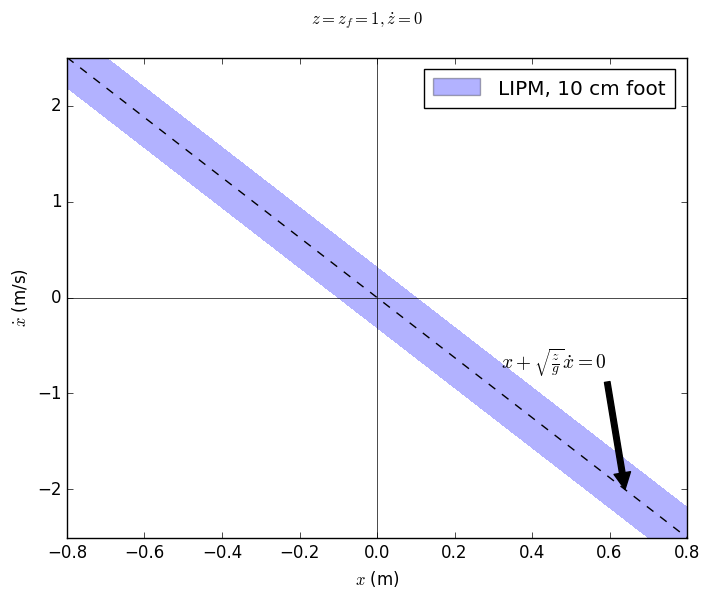

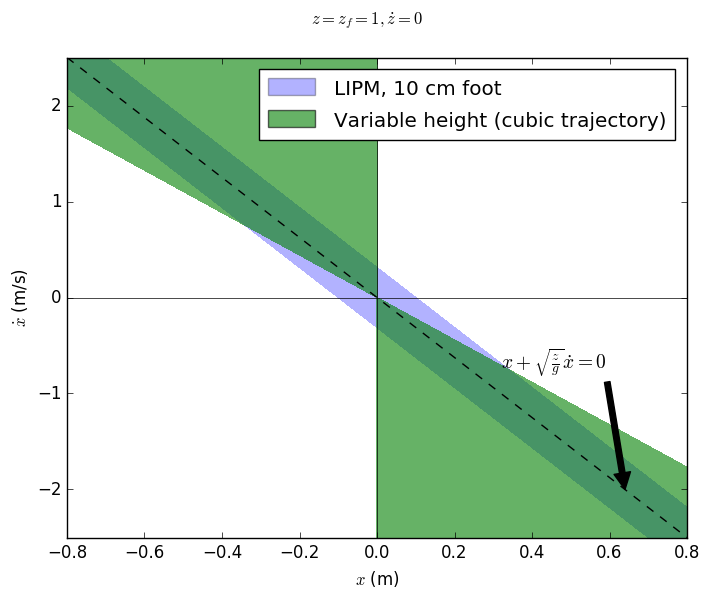

In [16]:
# TODO: move somewhere else
using LaTeXStrings
using PyPlot

lipm = LIPM("lipm", g, zf)
foot_size = 0.1
for show_variable_height in [false, true]
    font_size = 14
    plt[:rc]("font", size = font_size)
    lipm_color = "blue"
    lipm_alpha = 0.3
    variable_height_color = "g"
    variable_height_alpha = 0.6


    xrange = [-0.8, 0.8]
    xdrange = lipm.ω * xrange;
    num_points = 1000
    xlinspace = linspace(xrange..., num_points)
    xdlinspace = linspace(xdrange..., num_points)
    x_grid = [i::Float64 for i in xlinspace, j in xdlinspace]
    xd_grid = [j::Float64 for i in xlinspace, j in xdlinspace]
    xic_grid = abs(x_grid + 1 / lipm.ω * xd_grid)

    ion()
    fig = figure()
    xlim(xrange)
    ylim(xdrange)

    # axis lines
    axhline(linewidth = 0.5, color = "black")
    axvline(linewidth = 0.5, color = "black")

    # eigenvectors
    ω = lipm.ω
    # plot(xrange,  ω * xrange, "k--", linewidth = 1.0, zorder = 1)
    plot(xrange, -ω * xrange, "k--", linewidth = 1.0, zorder = 1)

    # ICP line annotation
    xarrowtip = xrange[2] - 0.1 * diff(xrange)
    arrowtip = [xarrowtip; -ω * xarrowtip]
    offset = [-diff(xrange) / 5; diff(xdrange) / 4]
    annotate(L"x + \sqrt{\frac{z}{g}} \dot{x} = 0", xy = arrowtip, xytext = arrowtip + offset, xycoords="data", arrowprops = Dict("facecolor"=>"black"))


    # axis labels
    xlabel(L"x" * " (m)")
    ylabel(L"\dot x" * " (m/s)")

    lipm_contour = contourf(x_grid, xd_grid, xic_grid, levels = [-Inf, foot_size], colors = lipm_color, alpha = lipm_alpha, zorder = 1)[:collections][1]
    lipm_proxy = plt[:Rectangle]((0,0),1,1, fc = lipm_color, alpha = lipm_alpha)

    if show_variable_height
        opposite_velocity_mask = max(-sign((x_grid .* xd_grid)), 0)
        #valid = VariableHeightInvertedPendulum.is_force_always_nonnegative_condition2(lipm.g, x_grid, zf, xd_grid, 0., zf) .* opposite_velocity_mask
        valid = -(xd_grid ./ x_grid + 1 / sqrt(2) * sqrt(lipm.g / zf)) .* opposite_velocity_mask
        invalidcontour = contourf(x_grid, xd_grid, valid, levels = [0, Inf], colors = variable_height_color, alpha = variable_height_alpha, zorder = 1)
        variable_height_proxy = plt[:Rectangle]((0,0),1,1, fc = variable_height_color, alpha = variable_height_alpha)
    end

    if show_variable_height
        legend([lipm_proxy, variable_height_proxy], ["LIPM, 10 cm foot", "Variable height (cubic trajectory)"])
    else
        legend([lipm_proxy], ["LIPM, 10 cm foot"])
    end

    suptitle(L"z = z_f = 1, \dot{z} = 0")
    savefig("../figures/ss_variable_height_$(show_variable_height).pdf")

    plt[:rcdefaults]()
end